## Práctica 1
### Elizaveta Gilyarovskaya
### Parte II: Convolución

In [1]:
from PIL import Image
import os
import PIL
import numpy as np
import matplotlib.pyplot as plt

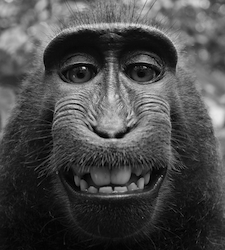

In [3]:
imagenes = [i for i in os.listdir() if i[-3::]== 'png']
mono = Image.open(imagenes[3])
# Comprobamos el número de canales y si es necesario convertimos a gris
if mono.mode != "L":
    mono = mono.convert("L")
    
im = np.array(mono)
Image.fromarray(im)

En la primera parte de esta primera práctica cree la siguiente función auxiliar para acortar el código cuando sea necesario hacer clip:

In [8]:
def aux_clip(I:np.ndarray):
    I = np.clip(I, 0, 255)
    return np.uint8(I)

Definimos la función genérica de **convolución** que recibe una imágen y un kernel. Dicho kernel puede ser un filtro de paso alto o de paso bajo. El objetivo es eliminar algunas frecuencias de la imágen de entrada, convolucionándola con el kernel que no las tenga.

In [9]:
def Convol(im:np.ndarray,k:np.ndarray): # k es el array del kernel
    kernel_width = k.shape[0]
    kernel_height= k.shape[1]
    width = im.shape[0]- kernel_width +1 #ancho image output
    height = im.shape[1]- kernel_height+1 #alto image output
    null = np.zeros(shape=(width, height))
    for i in range(width):
        for j in range(height):
            aux_matrix = im[i:i+kernel_width, j:j+kernel_height] # en la primera iteracion I=im[0:3,0:3], luego I=im[0:3,1:4]..
            multiply_result = np.multiply(aux_matrix, k)
            null[i,j] = multiply_result.sum()
    return aux_clip(null)

## Filtros de reducción de ruido

Ahora aplicamos filtros de paso bajo (reducción de ruido), con kernels de diferentes tamaños:

In [11]:
k = np.ones(shape=(3,3))
c = Convol(im, k/np.sum(k)) #importante normalizar los elementos de kernel para conservar el nivel de la señal
conv3 = Image.fromarray(c)

k = np.ones(shape=(11,11))
c = Convol(im, k/np.sum(k))
conv11 = Image.fromarray(c)

k = np.ones(shape=(21,21))
c = Convol(im, k/np.sum(k))
conv21 = Image.fromarray(c)

Las imagenes de salida resultantes quedan asi:

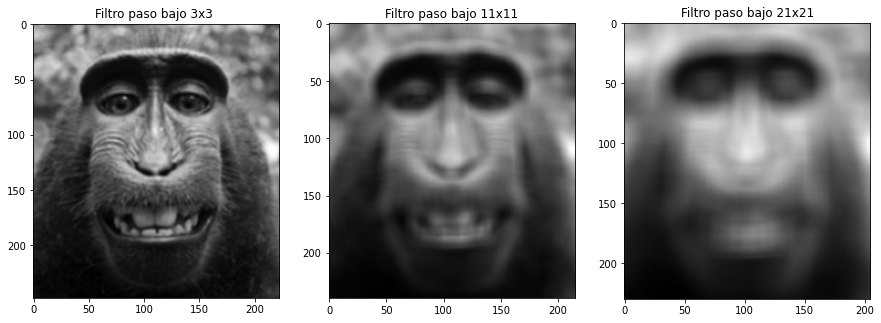

In [12]:
f, axarr = plt.subplots(1,3, figsize=(15,15))
axarr[0].imshow(conv3,cmap='gray')
axarr[1].imshow(conv11, cmap='gray')
axarr[2].imshow(conv21, cmap='gray')
axarr[0].title.set_text('Filtro paso bajo 3x3 ')
axarr[1].title.set_text('Filtro paso bajo 11x11')
axarr[2].title.set_text('Filtro paso bajo 21x21')

## Filtros de detección de contornos

Los contornos son frecuencias altas, son filtros de paso alto. Se pueden obtener a partir de filtros de paso bajo o definiendo directamente sus propios kernels.   
A continuación los obtenemos a partir de los filtros de paso bajo aplicados previamente, ya que los contornos es precisamente lo que queda cuando eliminamos las frecuencias bajas.

**Es necesario aplicar padding a la imágen resultante de convolución de paso bajo ya que ésta es de dimensiones más reducidas que la imágen inicial y no se puede hacer la operación de la resta elemento a elemento a no ser que coincidan las dimensiones.*

In [21]:
k = np.ones(shape=(3,3))
c = Convol(im, k/np.sum(k))
paso_alto3 = im - (np.pad(c,3//2)) #padding para igual las dimensiones
paso_alto3 = Image.fromarray(aux_clip(paso_alto3))


k = np.ones(shape=(11,11))
c = Convol(im, k/np.sum(k))
paso_alto11 =  im - (np.pad(c,11//2))
paso_alto11 = Image.fromarray(aux_clip(paso_alto11))


k = np.ones(shape=(21,21))
c = Convol(im, k/np.sum(k))
paso_alto21 =  im - (np.pad(c,21//2))
paso_alto21 = Image.fromarray(aux_clip(paso_alto21))

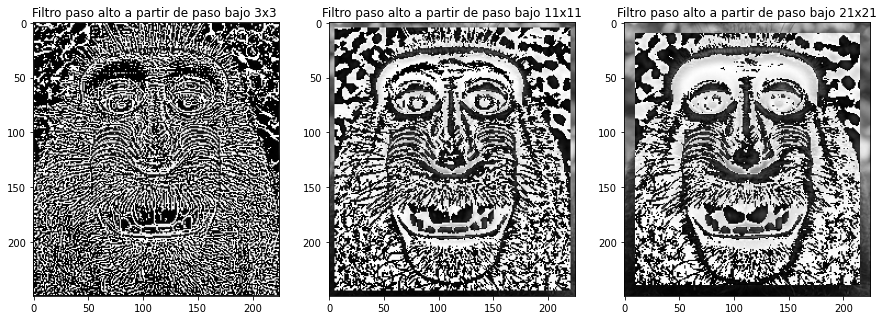

In [14]:
f, axarr = plt.subplots(1,3, figsize=(15,15))
axarr[0].imshow(paso_alto3,cmap='gray')
axarr[1].imshow(paso_alto11, cmap='gray')
axarr[2].imshow(paso_alto21, cmap='gray')
axarr[0].title.set_text('Filtro paso alto a partir de paso bajo 3x3 ')
axarr[1].title.set_text('Filtro paso alto a partir de paso bajo 11x11')
axarr[2].title.set_text('Filtro paso alto a partir de paso bajo 21x21')

Y finalmente aplicamos los filtros de paso alto a partir de sus propios kernels:

In [22]:
####### Filtro de Sobel 
kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
ky = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
gx = Convol(im, kx)
gy = Convol(im, ky)
g = np.sqrt(gx**2 + gy**2)
g *= 255.0 / g.max()
sobel = Image.fromarray(np.uint8(g))

####### Filtro de Laplace 
k = np.array([[0,1,0], [1,-4,1], [0,1,0]])
c = Convol(im, k)
laplace = Image.fromarray(c)

####### Filtro de Prewit
kx = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
ky = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
gx = Convol(im, kx)
gy = Convol(im, ky)
g = np.sqrt(gx**2 + gy**2)
g *= 255.0 / g.max()
prewit = Image.fromarray(np.uint8(g))

####### Filtro de Roberts 
kx = np.array([[1, 0], [0,-1]])
ky = np.array([[0, 1], [-1,0]])
gx = Convol(im, kx)
gy = Convol(im, ky)
g = np.sqrt(gx**2 + gy**2)
g *= 255.0 / g.max()
roberts = Image.fromarray(np.uint8(g))

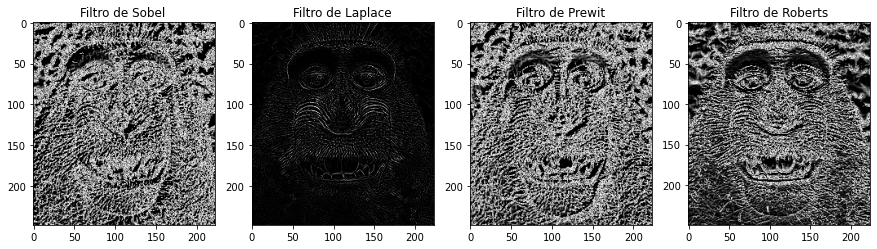

In [23]:
f, axarr = plt.subplots(1,4, figsize=(15,15))
axarr[0].imshow(sobel,cmap='gray')
axarr[1].imshow(laplace, cmap='gray')
axarr[2].imshow(prewit, cmap='gray')
axarr[3].imshow(roberts, cmap='gray')
axarr[0].title.set_text('Filtro de Sobel ')
axarr[1].title.set_text('Filtro de Laplace')
axarr[2].title.set_text('Filtro de Prewit')
axarr[3].title.set_text('Filtro de Roberts')